In [1]:
import numpy as np
import pandas as pd
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv('my_dataframe')
df2=pd.read_csv('bulgarian.csv')
df3=pd.read_csv('Telugu5.csv')
df4=pd.read_csv('Malayalam.csv')
df5=pd.read_csv('Georgian.csv')
df6=pd.read_csv('German.csv')
df7=pd.read_csv('Greek.csv')
df8=pd.read_csv('Italian.csv')
df9=pd.read_csv('japanese.csv')
df10=pd.read_csv('Kannada.csv')
df11=pd.read_csv('punjabi.csv')
df12=pd.read_csv('Tatar.csv')


In [3]:
#axis 0 means row after row 
df_final=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12],axis=0)
df_final

,Text,Language,ბუნება,Unnamed: 2,Unnamed: 3
0,hi,English,NaN,NaN,NaN
1,These robots use guidance mechanisms such as a...,English,NaN,NaN,NaN
2,Association rule learning is a rule-based mach...,English,NaN,NaN,NaN
3,It is intended to identify strong rules discov...,English,NaN,NaN,NaN
4,[60] Rule-based machine learning is a general ...,English,NaN,NaN,NaN
...,...,...,...,...,...
951,[345] [346] эчтәлек җитештерүчеләрнең эштән ки...,Tatar,NaN,NaN,NaN
952,"Карр язган: ""Веб 2.0 экстатик күренешләрендә ү...",Tatar,NaN,NaN,NaN
953,Мин куркытырлык бернәрсә дә күз алдыма китерә ...,Tatar,NaN,NaN,NaN
954,"[348] Башкалар Википедия, яки шундый ук тырышл...",Tatar,NaN,NaN,NaN


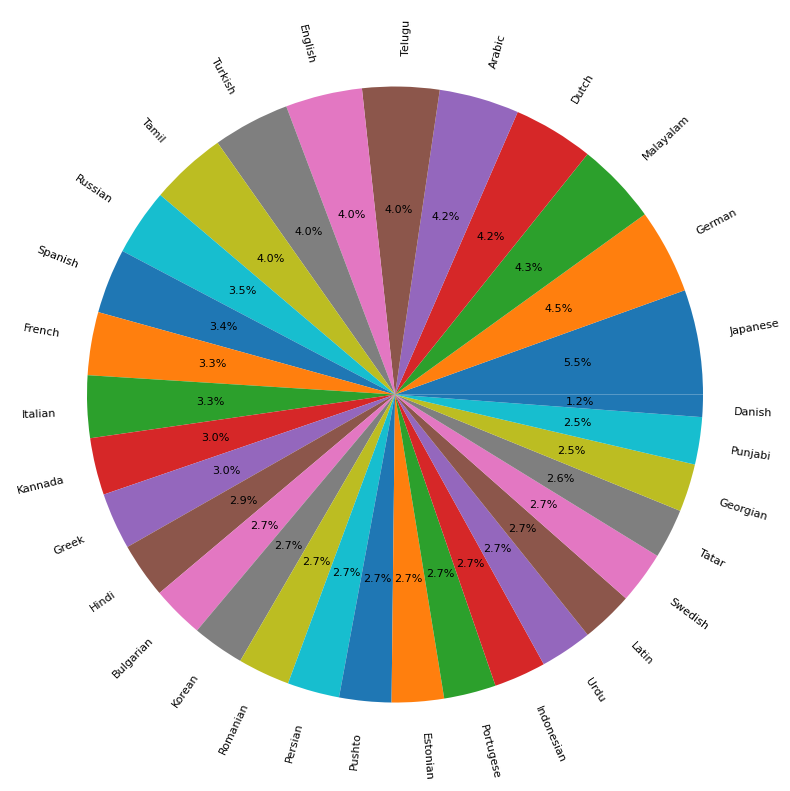

In [4]:
import matplotlib.pyplot as plt
language = df_final["Language"].value_counts().reset_index() 
#On using the reset_index() method on the grouped object we may get a ValueError.

plt.figure(figsize=(10,10))#width 10 inches and height 10 inches
labels= language['index'] # Used to specify the index of language

plt.pie(language["Language"],labels= labels, autopct='%.1f%%', textprops={'fontsize': 8},rotatelabels=True,normalize=True)
plt.show()

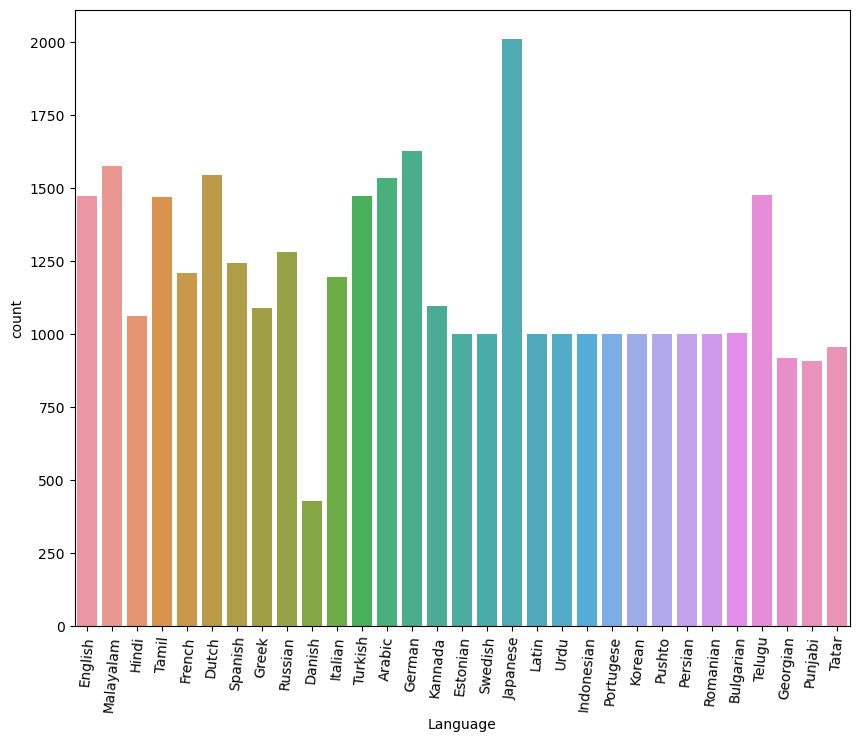

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
# Create the countplot and assign it to a variable
Language_d = sns.countplot(df_final["Language"], orient="h")

# Rotate the x-labels by 90 degrees
Language_d.set_xticklabels(Language_d.get_xticklabels(), rotation=85)

# Display the plot
plt.show()

In [9]:
#removing unwanted columns 
df_final=df_final.drop(columns=['ბუნება','Unnamed: 2','Unnamed: 3'])
df_final

,Text,Language
0,hi,English
1,These robots use guidance mechanisms such as a...,English
2,Association rule learning is a rule-based mach...,English
3,It is intended to identify strong rules discov...,English
4,[60] Rule-based machine learning is a general ...,English
...,...,...
951,[345] [346] эчтәлек җитештерүчеләрнең эштән ки...,Tatar
952,"Карр язган: ""Веб 2.0 экстатик күренешләрендә ү...",Tatar
953,Мин куркытырлык бернәрсә дә күз алдыма китерә ...,Tatar
954,"[348] Башкалар Википедия, яки шундый ук тырышл...",Tatar


In [10]:
#regular expression lib re 
#method to clean dataset means to remove the unwanted character special symbols  
import re

def remove_special_sym1(row):
    pattern=re.compile('[^\w\s]')
    pattern1=re.compile('[\d]')#0-9
    text=str(row['Text'])
    text=re.sub(pattern,'',text)
    text=re.sub(pattern1,'',text)
    return text

In [11]:
df_final['Text']=df_final.apply(remove_special_sym1,axis=1)
df_final.sample(50)

,Text,Language
25368,holism av grekiska holos hel odelad är i allmä...,Swedish
5221,لا يمكنني أن أقلل من اهتمامك إذا سألك أحدهم شي...,Arabic
6076,ನನನನನ ಸಲಸತತನ,Kannada
23775,haec commentatio automatice praeparata res ast...,Latin
223,Stellenangebote und verschiedene wettbewerbsb...,German
64,от различни фактори,Bulgarian
299,акон Википедия бите бүген тапкыр карады,Tatar
325,nan,Georgian
4592,üzgünüm diyebilirsiniz,Turkish
18867,haec commentatio automatice praeparata res ast...,Latin


In [12]:
#we have 30 Languages in this dataframe
df_final['Language'].value_counts()

Japanese      2011
German        1628
Malayalam     1575
Dutch         1546
Arabic        1536
Telugu        1477
English       1474
Turkish       1474
Tamil         1469
Russian       1280
Spanish       1245
French        1211
Italian       1196
Kannada       1096
Greek         1089
Hindi         1062
Bulgarian     1004
Korean        1000
Romanian      1000
Persian       1000
Pushto        1000
Estonian      1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Swedish       1000
Tatar          956
Georgian       919
Punjabi        908
Danish         428
Name: Language, dtype: int64

In [13]:
df_final.isnull().sum()

Text        0
Language    0
dtype: int64

In [14]:

df_final.dropna(subset=['Text'],inplace=True)
#df_final.dropna(subset=['Language'],inplace=True)

In [15]:
df_final.isnull().sum()

Text        0
Language    0
dtype: int64

In [16]:
X=np.array(df_final['Text'])

X

array(['hi',
       'These robots use guidance mechanisms such as active learning maturation motor synergies and imitation',
       'Association rule learning is a rulebased machine learning method for discovering relationships between variables in large databases',
       ..., 'Мин куркытырлык бернәрсә дә күз алдыма китерә алмыйм',
       ' Башкалар Википедия яки шундый ук тырышлыклар традицион басмаларны тулысынча алыштырачак дигән фикер белән бәхәсләшәләр\nМәсәлән чыбыклы журналның баш мөхәррире Крис Андерсон Табигатьтә Википедиянең халыкның зирәклеге алымы иң югары фәнни журналларны алыштырмас',
       ' Википедиянең биография нәшрият бизнесына йогынтысы турында даими бәхәсләр бар'],
      dtype=object)

In [17]:

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
#cv=cv.fit_transform()
X=cv.fit_transform(X)
X

<36584x289787 sparse matrix of type '<class 'numpy.int64'>'
	with 990662 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.preprocessing import LabelEncoder
Y=df_final['Language']
Y=np.array(df_final['Language'])

Y


array(['English', 'English', 'English', ..., 'Tatar', 'Tatar', 'Tatar'],
      dtype=object)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)
#random state what is 

In [21]:
from sklearn.naive_bayes import MultinomialNB
mNB_model=MultinomialNB()
mNB_model.fit(x_train,y_train)
mNB_model.score(x_test,y_test)*100

95.96544937677673

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# define the range of hyperparameters to search over
hyperparams = {
    'alpha': np.linspace(0.1, 1.0, 10),
    'fit_prior': [True, False]
}

# perform a grid search over the hyperparameters using cross-validation
grid_search = GridSearchCV(estimator=mNB_model,param_grid=hyperparams, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# print the best hyperparameters and the corresponding validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Validation score:", grid_search.best_score_)

# use the best hyperparameters to make predictions on the test data
y_pred = grid_search.predict(x_test)

# compute the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)*100
print("Test accuracy:", accuracy)

Best hyperparameters: {'alpha': 0.1, 'fit_prior': True}
Validation score: 0.9641372650755218
Test accuracy: 96.7636125082003


Text(0, 0.5, 'Actual label')

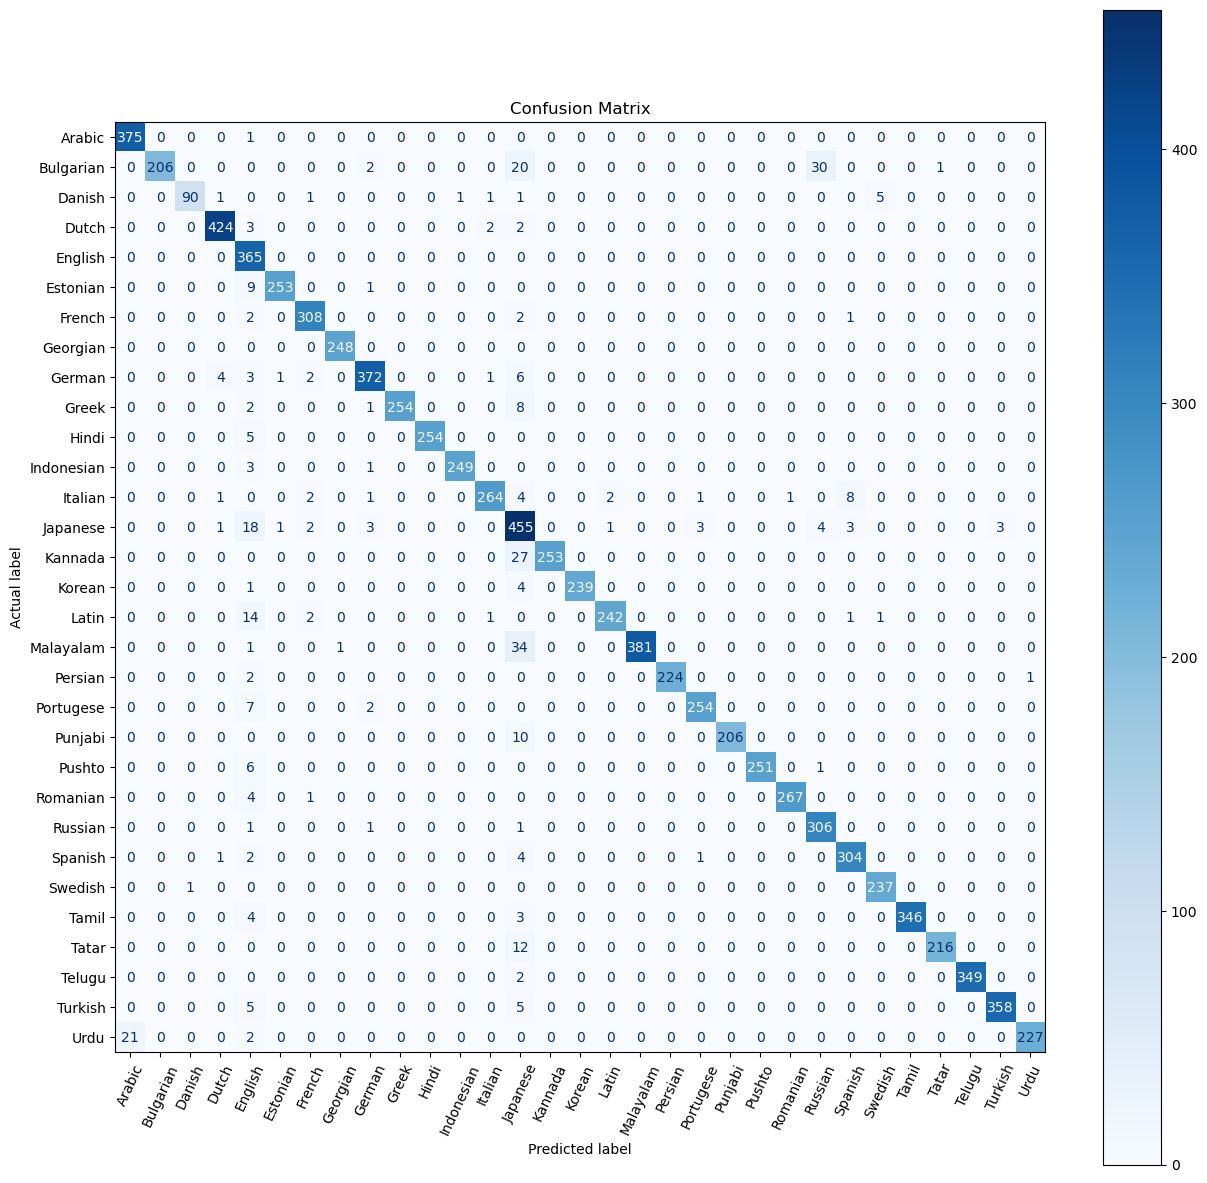

In [23]:
import matplotlib.pyplot as plt
fg,ax=plt.subplots(figsize=(15,15))
from sklearn.metrics import plot_confusion_matrix

cmd = plot_confusion_matrix(mNB_model,x_test, y_test,cmap=plt.cm.Blues, normalize=None,xticks_rotation=65,ax=ax)
                       
plt.title('Confusion Matrix')
plt.ylabel('Actual label')

In [24]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print()

print("Precision:",metrics.precision_score(y_test, y_pred,average=None))
print()
print("Sensitivity:",metrics.recall_score(y_test, y_pred,average=None))
print()
print("F1_score:",metrics.f1_score(y_test, y_pred,average=None))


Accuracy: 0.967636125082003

Precision: [0.95907928 0.98717949 0.97979798 0.99529412 0.8161435  0.98832685
 0.98095238 0.96498054 0.97674419 1.         1.         1.
 0.98214286 0.78020134 1.         1.         0.98790323 1.
 1.         0.99227799 1.         1.         0.99256506 0.9591195
 0.99025974 0.9875     1.         0.99547511 1.         1.
 0.99570815]

Sensitivity: [0.99734043 0.89189189 0.97       0.98143852 0.99726027 0.96577947
 0.98722045 1.         0.97172237 0.95849057 0.98069498 0.98418972
 0.96830986 0.94129555 0.90357143 0.97131148 0.93869732 0.91366906
 0.98678414 0.97718631 0.97222222 0.96124031 0.98161765 0.98705502
 0.9775641  0.99579832 0.98016997 0.96491228 0.99430199 0.97282609
 0.928     ]

F1_score: [0.97783572 0.93711968 0.97487437 0.98831776 0.89765721 0.97692308
 0.98407643 0.98217822 0.9742268  0.97880539 0.99025341 0.99203187
 0.9751773  0.85321101 0.94934334 0.98544699 0.96267191 0.95488722
 0.99334812 0.98467433 0.98591549 0.98023715 0.987061   0.97288

In [30]:
#import required libraries
import tkinter as tk
import numpy as np
import joblib #joblib module is used for saving and loading machine learning models in Python.

# load the CountVectorizer and MultinomialNB model
cv = joblib.load('cv.joblib')
mNB_model = joblib.load('mNB_model.joblib')

# define a function to predict the label
def predict_label():
    # get user input from the input box
    user_input = entry.get()
    # check if the user entered some text
    if not user_input:
        label3.config(text="Error: Please enter some text.")
        label3.pack()
        # delete the output after 1 second
        label3.after(1000, label3.config, {'text': ''})
        return
    # transform the user input using the loaded CountVectorizer model
    data = cv.transform([user_input]).toarray()
    # make a prediction using the loaded MultinomialNB model
    y_pred = mNB_model.predict(data)
    # display the predicted label
    label3.config(text=f"Detected Language: {y_pred[0]}")
    # delete the output after 5 seconds
    label3.after(5000, label3.config, {'text': ''})

# create the UI window
root = tk.Tk()
root.title("DASSD Sep-2022")

# set the font size for the UI
root.option_add("*Font", "Arial 20")

# get the dimensions of the screen
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()

# set the dimensions and position of the UI window
window_width = int(screen_width * 0.8)
window_height = int(screen_height * 0.8)
x_pos = int(screen_width/2 - window_width/2)
y_pos = int(screen_height/2 - window_height/2)
root.geometry(f"{window_width}x{window_height}+{x_pos}+{y_pos}")

# add some blank space to the UI
label13 = tk.Label(root, text=" ")
label13.pack()

# add a title to the UI
label2 = tk.Label(root, text="Language Detection Using ML",font=("Arial", 24), fg="blue")
label2.pack()

# add some more blank space to the UI
label3 = tk.Label(root, text=" ")
label3.pack()

# add a label and input box to the UI for the user to enter text
label1 = tk.Label(root, text="Enter Sentence:")
label1.pack()

entry = tk.Entry(root, width=40) # increase the width and height of the text box
entry.pack()

# add a button to the UI to detect the language
button = tk.Button(root, text="Detect", command=predict_label)
button.pack()

# add an output label to the UI to display the predicted language
label3 = tk.Label(root, text=" ")
label3.pack()

#Create a label with some text
#label4 = tk.Label(root, text="Welcome to Language Detection App!", font=("Arial", 24), fg="blue")
#label4.pack()

maker_label = tk.Label(root,text=" Sushant",font=("Arial", 12), fg="gray")
maker_label.pack(side="bottom")
maker_label = tk.Label(root,text="Made by",font=("Arial", 12), fg="gray")
maker_label.pack(side="bottom")


# run the UI
root.mainloop()